### Understanding neural networking in simple steps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

#### Loading dataset

In [2]:
# Load the dataset for
data = pd.read_csv('diabetes.csv')

In [3]:
#viewing data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### The objective is to predict based on diagnostic measurements whether a patient has diabetes

<AxesSubplot:>

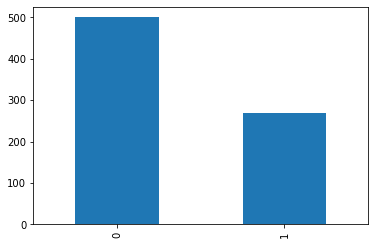

In [4]:
import seaborn as sns
data['Outcome'].value_counts().plot(kind='bar')

### Preparing Data For Modelling

In [5]:
# Split into input(X) and output(y) variables
predictors = data.iloc[:,0:8]
response = data.iloc[:,8]

In [6]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


### Training the neural network model
### There are two ways to build keras models: sequential and functional
### The sequential API allows you to create models layer by layer

In [7]:
# define the keras model - layer by layer
kerasmodel = Sequential() #initializing model - Dense for fully connected layer
kerasmodel.add(Dense(12, input_dim=8, activation='relu')) # First hidden layer
kerasmodel.add(Dense(8, activation='relu')) #Relu to avoid vanishing/exploading gradient problem 
kerasmodel.add(Dense(1, activation='sigmoid')) #since output is binary so "sigmoid"- #Outpul layer

#please note Weight and bias initialization are done by keras default methods using "glorot_uniform"

In [8]:
# compiling model
kerasmodel.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [9]:
# fitting model
kerasmodel.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 22s 2ms/step - loss: 7.9657 - accuracy: 0.3937
Epoch 2/150
62/62 [==============================] - 0s 1ms/step - loss: 2.0320 - accuracy: 0.4877
Epoch 3/150
62/62 [==============================] - 0s 1ms/step - loss: 0.9734 - accuracy: 0.5881
Epoch 4/150
62/62 [==============================] - 0s 1ms/step - loss: 1.2103 - accuracy: 0.5898
Epoch 5/150
62/62 [==============================] - 0s 1ms/step - loss: 1.2008 - accuracy: 0.6295
Epoch 6/150
62/62 [==============================] - 0s 1ms/step - loss: 0.8233 - accuracy: 0.5654
Epoch 7/150
62/62 [==============================] - 0s 1ms/step - loss: 0.8946 - accuracy: 0.6117
Epoch 8/150
62/62 [==============================] - 0s 955us/step - loss: 0.7803 - accuracy: 0.6290
Epoch 9/150
62/62 [==============================] - 0s 926us/step - loss: 0.7813 - accuracy: 0.5964
Epoch 10/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7606 - accuracy: 0.6122
Epoc

62/62 [==============================] - 0s 1ms/step - loss: 0.5342 - accuracy: 0.7519
Epoch 82/150
62/62 [==============================] - 0s 993us/step - loss: 0.5222 - accuracy: 0.7552
Epoch 83/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5435 - accuracy: 0.7391
Epoch 84/150
62/62 [==============================] - 0s 998us/step - loss: 0.5535 - accuracy: 0.7271
Epoch 85/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5548 - accuracy: 0.7207
Epoch 86/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5602 - accuracy: 0.7249
Epoch 87/150
62/62 [==============================] - 0s 946us/step - loss: 0.5418 - accuracy: 0.7502
Epoch 88/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.7415
Epoch 89/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.7714
Epoch 90/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6146 - accuracy: 0.7426
Epoch 9

In [11]:
# Train accuracy
_, accuracy = kerasmodel.evaluate(X_train, y_train)
print('Train Accuracy: %.2f' %(accuracy*100))

20/20 [==============================] - 1s 756us/step - loss: 0.5808 - accuracy: 0.7231
Train Accuracy: 72.31


In [14]:
# Predicting the test results
y_pred = kerasmodel.predict(X_test)
y_pred = (y_pred > 0.5)

In [15]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [16]:
# Making the confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
cm

array([[94,  3],
       [49,  8]], dtype=int64)

In [18]:
#Calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [19]:
score

0.6623376623376623